In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\parna\Downloads\archive (7)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove missing values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [6]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Percentage:")
print(churn_rate)

Churn Percentage:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


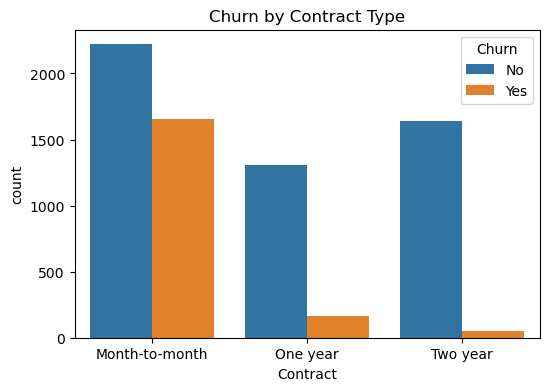

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

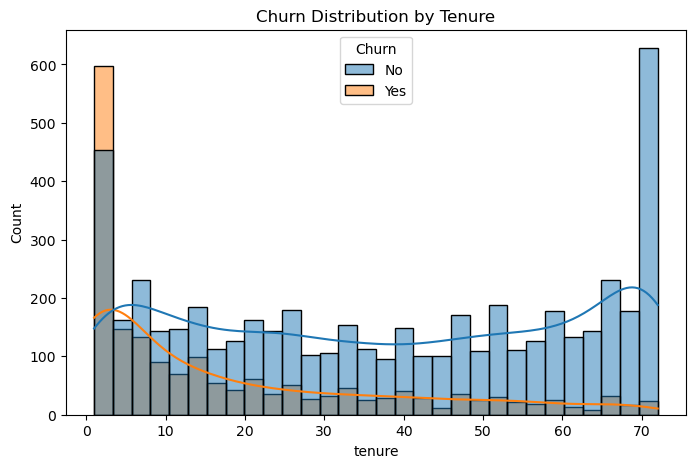

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Churn Distribution by Tenure")
plt.show()

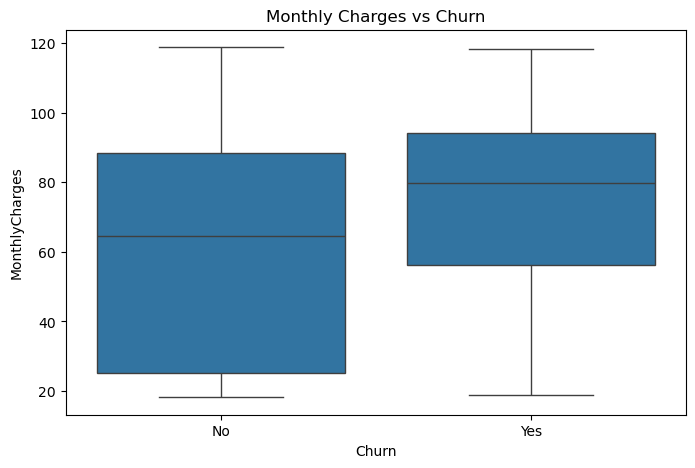

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

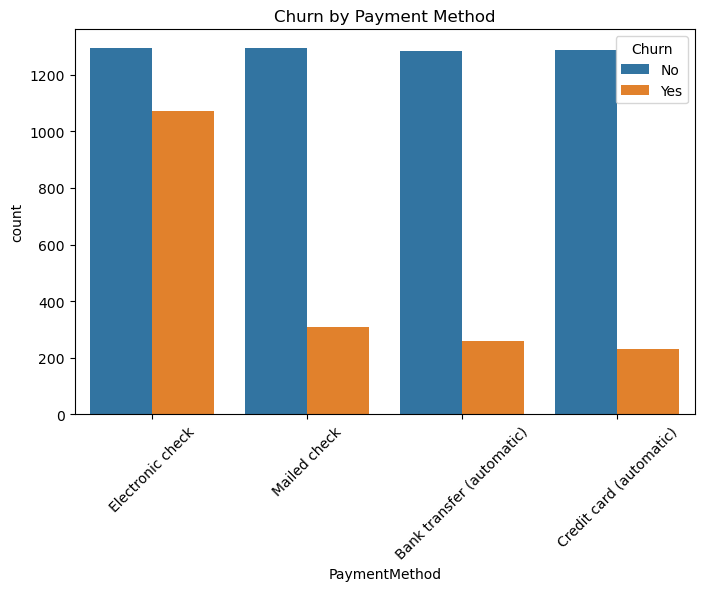

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()

In [11]:
avg_tenure_churned = df[df['Churn']=='Yes']['tenure'].mean()
avg_tenure_retained = df[df['Churn']=='No']['tenure'].mean()

print("Average Tenure (Churned):", round(avg_tenure_churned,1))
print("Average Tenure (Retained):", round(avg_tenure_retained,1))

Average Tenure (Churned): 18.0
Average Tenure (Retained): 37.7
